## Model Evaluation for college scorecard - earnings prediction

This notebook will use several different supervised learning regression algorithms to model earnings after college using College Scorecard data. The models included for evaluation will be:

1. Linear Regression
1. Decision Tree
1. Random Forest

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 12345
#load the data

data = pd.read_pickle('clean_notna_data.pickle')
X = data['X']
y = data['y']
name = X['INSTNM']
X.drop('INSTNM', axis = 1, inplace = True)
data = X.copy()
data['Y'] = y

### Data preprocessing
We need to split the data into training and test sets. Also, we need to think about possibly centering/normalizing the data.

Normalizing may make sense at least for linear regression, so we can understand the features a little bit better

Also, we can think about using PCA (if only for visualization purposes)

In [338]:
# Split the data into training and test
# Need to figure out best way to split time series data
# Do we split based only on colleges (i.e. each college is either train or test)
# Do we split based on college and year (i.e. each data entry is either train or test)
# Another way to split?

train_test_index = {0:'',1:'',2:'',3:'',4:'',5:''}
for i in range(0,6):
    train_test_index[i] = {
        'train': X[X['YEAR'] <= i+2002].index,
        'test' : X[X['YEAR'] == i + 2003].index
    }
X.drop('YEAR', axis = 1, inplace = True)

In [339]:
from sklearn.model_selection import train_test_split
train_val_index = list()
train_val_dataset = list()
for i in range(len(train_test_index)):
    X_i = X.iloc[train_test_index[i]['train']]
    y_i = y.iloc[train_test_index[i]['train']]
    train_val_dataset.append(train_test_split(X_i,y_i,test_size = .2, random_state = seed))
    train_val_index.append((train_val_dataset[i][0].index,train_val_dataset[i][1].index))

### Linear Regression
First try: no feature scaling

In [340]:
from sklearn.linear_model import LinearRegression
accuracy_array = {'train': list(), 'val': list()}
linreg_coeffs = np.zeros_like(X.columns)
for i in range(0,6):
    X_train = X.loc[train_test_index[i]['train']]
    y_train = y.iloc[train_test_index[i]['train']]
    X_val = X.loc[train_test_index[i]['test']]
    y_val = y.iloc[train_test_index[i]['test']]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    accuracy_array['train'].append(lin_reg.score(X_train, y_train))
    accuracy_array['val'].append(lin_reg.score(X_val, y_val))
    linreg_coeffs += lin_reg.coef_
linreg_coeffs /= 6
print('R^2 of training set: ',np.mean(accuracy_array['train']))
print('R^2 of validation set: ',np.mean(accuracy_array['val']))

R^2 of training set:  0.8323611618698887
R^2 of validation set:  0.8159001447615705


Second try: feature scaling

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
X_scaled = data_scaled[:,:-1]
y_scaled = data_scaled[:,-1]


accuracy_array = {'train': list(), 'val': list()}
for i in range(0,6):
    X_train = X_scaled[train_test_index[i]['train']]
    y_train = y_scaled[train_test_index[i]['train']]
    X_val = X_scaled[train_test_index[i]['test']]
    y_val = y_scaled[train_test_index[i]['test']]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    accuracy_array['train'].append(lin_reg.score(X_train, y_train))
    accuracy_array['val'].append(lin_reg.score(X_val, y_val))
print('R^2 of training set: ',np.mean(accuracy_array['train']))
print('R^2 of validation set: ',np.mean(accuracy_array['val']))

R^2 of training set:  0.8405600252143582
R^2 of validation set:  -9.404224914595542e+22


### Decision Tree
First using default params, then tuning params
We can think also use different criterion for splitting (MSE vs MAE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#Do decision tree using out of box parameters
dec_tree = DecisionTreeRegressor(criterion = 'mse', random_state = seed)
dec_tree.fit(X_train, y_train)

# Train and test accuracy
train_accuracy = dec_tree.score(X_train, y_train)
test_accuracy = dec_tree.score(X_test, y_test)
print('mse')
print('training accuracy:\t', train_accuracy)
print('test accuracy:\t\t', test_accuracy)

#print top 20 feature importance
x = np.arange(20)
sorted_inds = np.argsort(-(dec_tree.feature_importances_))[:20]
sorted_colnames = X.columns[sorted_inds]
fig = plt.figure(figsize = (10,5))
plt.bar(x,model.feature_importances_[sorted_inds], width = 0.8)
plt.xticks(x,(sorted_colnames))
plt.show()

#Repeat decision tree using out of box parameters with 'mae' as criterion
dec_tree = DecisionTreeRegressor(criterion = 'mae', random_state = seed)
dec_tree.fit(X_train, y_train)

# Train and test accuracy
train_accuracy = dec.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print('mae')
print('training accuracy:\t', train_accuracy)
print('test accuracy:\t\t', test_accuracy)

#print top 20 feature importance
x = np.arange(20)
sorted_inds = np.argsort(-(model.feature_importances_))[:20]
sorted_colnames = df.columns[sorted_inds]
fig = plt.figure(figsize = (10,5))
plt.bar(x,model.feature_importances_[sorted_inds], width = 0.8)
plt.xticks(x,(sorted_colnames))
plt.show()

Tune hyper parameters

In [353]:
min_samples_split_range = np.arange(??,??,??)
min_samples_leaf_range = np.arange(??,??,??)

# Function that takes model and outputs R^2
def get_r2(criterion, min_split,min_leaf):
    model = DecisionTreeRegressor(criterion = criterion, random_state = seed, 
                                  min_samples_split = min_split,
                                  min_samples_leaf = min_leaf)
    model.fit(X_train,y_train)
    return(model.score(X_test, y_test))

r2_array = dict{
    'mse' : np.zeros([10,10]),
    'mae' : np.zeros([10,10])}
#This for loop runs the model
for crit in ['mse', 'mae']:
    for i in range(0,10):
        min_samples_split = min_samples_split_values[i]
        for j in range(0,10):
            min_samples_leaf = min_samples_leaf_values[j]
            r2_array[crit][i,j]=get_r2(crit, min_samples_split,min_samples_leaf)

#plot the models
fig = plt.figure(figsize = (10,4))
for i in range(0,10):
    plt.plot(min_samples_split_values, r2_array['mse'][:,i], 
             label = 'min_leaf: ' + str(min_samples_leaf_values[i]))
plt.legend(loc=(1.01,0.25))
plt.xticks(min_samples_split_values)
plt.xlabel('min_samples_split')
plt.title('R^2 for MSE decision tree')
plt.show()

fig = plt.figure(figsize = (10,4))
for i in range(0,10):
    plt.plot(min_samples_split_values, r2_array['mae'][:,i], 
             label = 'min_leaf: ' + str(min_samples_leaf_values[i]))
plt.legend(loc=(1.01,0.25))
plt.xticks(min_samples_split_values)
plt.xlabel('min_samples_split')
plt.title('R^2 for MSE decision tree')
plt.show()
print(np.max(r2_array))

### Random forest


In [350]:
#First using out-of-box parameters (which will probably lead to overfitting)
#use mse and then use mae
from sklearn.ensemble import RandomForestRegressor
accuracy_array = {'mse':{'train':list(), 'val': list(), 'oob': list()},
                  'mae':{'train':list(), 'val': list(), 'oob': list()}}
feature_importances = np.zeros_like(X.columns)
for i in range(0,6):
    X_train = X.loc[train_val_index[i][0]]
    y_train = y.iloc[train_val_index[i][0]]
    X_test = X.loc[train_val_index[i][1]]
    y_test = y.iloc[train_val_index[i][1]]
    rand_forest = RandomForestRegressor(criterion = 'mse',oob_score = True, random_state = seed,
                                       n_estimators = 100)
    rand_forest.fit(X_train, y_train)
    accuracy_array['mse']['oob'].append(rand_forest.oob_score_)
    accuracy_array['mse']['train'].append(rand_forest.score(X_train, y_train))
    accuracy_array['mse']['val'].append(rand_forest.score(X_test, y_test))
    feature_importances += rand_forest.feature_importances_
feature_importances /= 6
print('mse')
print('OOB score : ', np.mean(accuracy_array['mse']['oob']))
print('Train accuracy: ', np.mean(accuracy_array['mse']['train']))
print('Validation accuracy: ', np.mean(accuracy_array['mse']['val']))
print()
# rand_forest = RandomForestRegressor(criterion = 'mae',oob_score = True, random_state = seed)
# rand_forest.fit(X_train, y_train)
# print('mae')
# print('OOB score : ' + rand_forest.oob_score())
# print('Train accuracy: ' + rand_forest.score(X_train, y_train))
# print('Test accuracy: ' + rand_forest.score(X_test, y_test))


mse
OOB score :  0.8766904199033547
Train accuracy:  0.9780516398978031
Validation accuracy:  0.8222860664214225



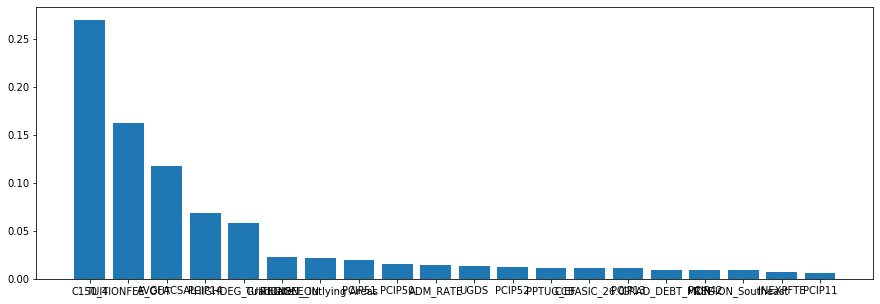

C150_4 :  0.26945940433385424
TUITIONFEE_OUT :  0.16263081880762828
AVGFACSAL :  0.11700871523103434
PCIP14 :  0.06859054329274754
HIGHDEG_Graduate :  0.0585176535527387
TUITIONFEE_IN :  0.022520449712682435
REGION_Outlying Areas  :  0.02174976998680138
PCIP51 :  0.019307929309829268
PCIP50 :  0.015849342207949178
ADM_RATE :  0.014056039084847025
UGDS :  0.012929762502712537
PCIP52 :  0.01260887909878377
PPTUG_EF :  0.011268062399665069
CCBASIC_26.0 :  0.011209833804264241
PCIP13 :  0.010915400093365642
GRAD_DEBT_MDN :  0.009735356213739952
PCIP42 :  0.009687715151954303
REGION_Southeast  :  0.00933222946001444
INEXPFTE :  0.006932357213697132
PCIP11 :  0.006614375379904503


In [344]:
x = np.arange(20)
sorted_inds = np.argsort(-(feature_importances))[:20]
sorted_colnames = X.columns[sorted_inds]
fig = plt.figure(figsize = (15,5))
plt.bar(x,feature_importances[sorted_inds], width = 0.8)
plt.xticks(x,(sorted_colnames))
plt.show()
for i in range(0,20):
    print(sorted_colnames[i],': ', feature_importances[sorted_inds[i]])

In [346]:
#change some parameters and look for improvement (use better of mae and mse)

#first change n_estimators (to 100 because that is sklearn's version 0.22 default)
# and change max_features to 0.66 (since that is what wikipedia claims is a good starting point
# for a random forest regression)
n_estimators = 100
max_features = 0.66


accuracy_array = {'mse':{'train':list(), 'val': list(), 'oob': list()},
                  'mae':{'train':list(), 'val': list(), 'oob': list()}}
feature_importances = np.zeros_like(X.columns)
for i in range(0,6):
    X_train = X.loc[train_test_index[i]['train']]
    y_train = y.iloc[train_test_index[i]['train']]
    X_test = X.loc[train_test_index[i]['test']]
    y_test = y.iloc[train_test_index[i]['test']]
    rand_forest = RandomForestRegressor(n_estimators = n_estimators, max_features = max_features,
                                    criterion = 'mse', oob_score = True, random_state = seed)
    rand_forest.fit(X_train, y_train)
    accuracy_array['mse']['oob'].append(rand_forest.oob_score_)
    accuracy_array['mse']['train'].append(rand_forest.score(X_train, y_train))
    accuracy_array['mse']['val'].append(rand_forest.score(X_test, y_test))
    feature_importances += rand_forest.feature_importances_
feature_importances /= 6
print('mse')
print('OOB score : ', np.mean(accuracy_array['mse']['oob']))
print('Train accuracy: ', np.mean(accuracy_array['mse']['train']))
print('Test accuracy: ', np.mean(accuracy_array['mse']['val']))
print()
#change other parameters as we see fit (probably max_depth, min_size_leaf, min_size_split)

mse
OOB score :  0.8863937369019174
Train accuracy:  0.9783407241211582
Test accuracy:  0.9055674067672123



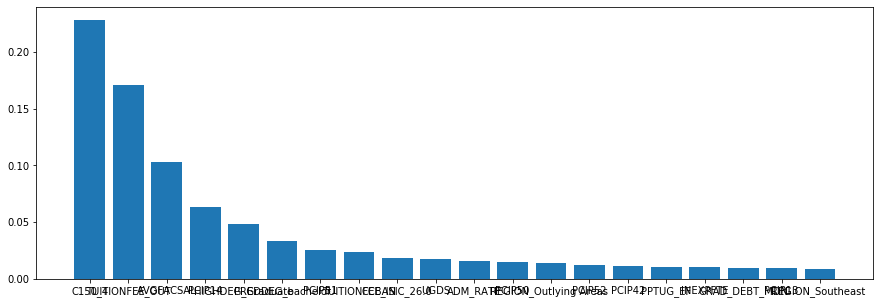

C150_4 :  0.2280990693940849
TUITIONFEE_OUT :  0.17045571560525477
AVGFACSAL :  0.10260317285475368
PCIP14 :  0.0635125307657225
HIGHDEG_Graduate :  0.04798258532851507
PREDDEG_bachelor :  0.0337949680552339
PCIP51 :  0.025483892956744594
TUITIONFEE_IN :  0.023954828212326945
CCBASIC_26.0 :  0.018024619769840246
UGDS :  0.017331834910620788
ADM_RATE :  0.015617523903433688
PCIP50 :  0.015241825998528044
REGION_Outlying Areas  :  0.013674251792548725
PCIP52 :  0.012273795536021911
PCIP42 :  0.011742295512048103
PPTUG_EF :  0.010807093552307351
INEXPFTE :  0.010287063863129874
GRAD_DEBT_MDN :  0.00983940020892571
PCIP13 :  0.009656458311437648
REGION_Southeast  :  0.00898344144098689


In [347]:
x = np.arange(20)
sorted_inds = np.argsort(-(feature_importances))[:20]
sorted_colnames = X.columns[sorted_inds]
fig = plt.figure(figsize = (15,5))
plt.bar(x,feature_importances[sorted_inds], width = 0.8)
plt.xticks(x,(sorted_colnames))
plt.show()
for i in range(0,20):
    print(sorted_colnames[i],': ', feature_importances[sorted_inds[i]])

Least accurate predictions

In [348]:
prediction = rand_forest.predict(X_test)
diff = np.abs(prediction - y_test)
sorted_inds = np.argsort(-(diff))[:10]

for i in sorted_inds:
    name_index = train_test_index[5]['test'][i]
    print(name[name_index])
    print(prediction[i])
    print(y_test[name_index])
    print(diff[name_index])
    print()

Union College
35038.36269615378
51118.796099869454
16080.433403715673

Union College
36490.11424230345
51118.796099869454
14628.681857566007

MCPHS University
89325.47231182462
77548.95520561357
11776.517106211046

Emmanuel College
37840.53473920073
26327.71662859008
11512.818110610653

United Talmudical Seminary
23134.440441370116
13317.52203002611
9816.918411344006

Wentworth Institute of Technology
44933.00827664928
54601.84032310705
9668.83204645777

Grand Canyon University
38649.032315470955
29093.663511749346
9555.368803721609

Alfred University
42077.378390241676
32781.59268929504
9295.785700946639

Tulane University of Louisiana
53102.63712799698
43845.380221932115
9257.256906064868

Southwest Baptist University
37911.758191493296
29298.54846605744
8613.209725435856



Most accurate predictions

In [349]:
prediction = rand_forest.predict(X_test)
diff = np.abs(prediction - y_test)
sorted_inds = np.argsort(diff)[:10]

for i in sorted_inds:
    name_index = train_test_index[5]['test'][i]
    print(name[name_index])
    print(prediction[i])
    print(y_test[name_index])
    print(diff[name_index])
    print()

Northeast State Community College
23255.939289183476
23254.44231396867
1.496975214806298

University of Northern Colorado
34627.055797274435
34625.557278067885
1.4985192065505544

John C Calhoun State Community College
24583.69035403582
24586.194516971278
2.5041629354564066

Rhodes College
38001.26138009157
38006.159024151435
4.897644059863524

Snead State Community College
22939.478028719896
22947.11488250653
7.636853786632855

Monmouth University
42300.10796154783
42308.74306462141
8.635103073582286

Auburn University
40473.42970748855
40464.778475848565
8.651231639982143

Saint Augustine's University
22034.24870539377
22025.132588120105
9.116117273664713

Indian Hills Community College
28366.582820066054
28376.566171671016
9.983351604962081

University of Central Oklahoma
34820.24720736243
34830.44223237598
10.19502501354873

